# Assignment 2 CNN AND ANN USING CROSS FOLD
## Name: Aloukik Aditya
## student_ID: 1115290

In [1]:
import pandas as pd#--------------------------------------LOading all libraries here
from pandas import DataFrame
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from math import*
import itertools
import re
from sklearn.preprocessing import MinMaxScaler
import os
from scipy.spatial.distance import pdist,squareform
import tensorflow as tf
from sklearn.model_selection import train_test_split
#import tensorflow_docs as tfdocs

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import pathlib

import matplotlib.pyplot as plt
import os
from sklearn.model_selection import KFold, StratifiedKFold

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [37]:
def comparison_graph(predict, orignal):#-------------------------function for comapring graph
    x_ax = range(len(predict))
    plt.scatter(x_ax, orignal, s=5, color="blue", label="original")
    plt.plot(x_ax, predict, lw=0.8, color="red", label="predicted")
    plt.legend()
    plt.show()


In [40]:
def comparison_graph_rmse(ann_rmse, cnn_rmse):#-------------------------function for comapring graph
    x_ax = range(len(ann_rmse))
    plt.plot(x_ax, ann_rmse, lw=0.8, color="blue", label="ANN_rmse")
    plt.plot(x_ax, cnn_rmse, lw=0.8, color="red", label="CNN_rmse")
    plt.legend()
    plt.show()

In [5]:
def get_values(dataset):
    df = DataFrame (dataset)
    new_np = np.asarray(df)
    
    strr1 = new_np###############--------------------removing all the brackets and unwated elemets
    strr_removved = []
    strr_removved.clear()
    for i in range(strr1.size):
        strr_removved.append(strr1[i][0].replace("[", "").replace("]", "").replace("]", ""))
    

    
    b =[]#-------------------------------------- creating list of all numbers only
    b.clear()
    for i in range(strr1.size):
        a = [int(s) for s in strr_removved[i].split() if s.isdigit()]
        b.append(a)
        
    #------------------merging all the digit into single list

    merged = list(itertools.chain(*b))
    roww = np.asarray(merged)
    
    for col in df.columns: 
        valuee = col
        
    #-------------------------------------getting optimized value
    j = str(re.findall(r'[\d\.\d]+', valuee))
    l=j.replace("[","").replace("]","").replace("'","").replace("'","")
    
    target_val = float(l)
    
    coll = DataFrame(roww)
    df_rows = coll.T
    
    df_rows['Optimized_value'] = target_val 
    
    #df_target = DataFrame(target_val)
    
    #print(df_rows)
    #print(type(target_val))
    
    #print(df_target)
    
    return(df_rows)

In [6]:
rmse_list_ann = []
rmse_list_ann.clear()
def ANN_model(X_train,Y_train,X_test,Y_test):#------------------creating ann model here
    
    def getModel():
        model = Sequential()
        model.add(Dense(200, input_dim = 2500, activation='relu'))
        model.add(Dense(75, activation='relu'))
        model.add(Dense(50, activation='relu'))
        model.add(Dense(25, activation='relu'))
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')
        return model
    model = getModel()
    
    verbose, epochs, batch_size = 1, 20, 1
    def showResults(test, pred):
        mse=mean_squared_error(test, pred)
        rmse = sqrt(mse)
        print("RMSE: ", rmse)
        rmse_list_ann.append(rmse)
        return rmse
    model.load_weights('1115290-ANN.h5')  
    # Train the model with training data
    history = model.fit(X_train, Y_train, validation_split = 0.3, batch_size = batch_size, epochs = epochs)
    
    yPredict = model.predict(X_test)
    showResults(Y_test, yPredict)
    #return showResults(Y_test, yPredict)
    model.save('1115290-ANN.h5')
    print("===========  Printing graph for ANN MODEL  ================")
    
    comparison_graph(yPredict,Y_test)
    
    

    
    



In [7]:
rmse_list_cnn = []
rmse_list_cnn.clear()
def CNN_model(X_train,Y_train,X_test,Y_test):#--------------------------creating cnn model here
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    #model.load('1115290-CNN.h5')
    def getModel():
        model = Sequential()
        model.add(Conv1D(32, 2, activation="relu", input_shape=(2500, 1)))
        model.add(Flatten())
        model.add(Dense(64, activation="relu"))
        model.add(Dense(1))
        model.compile(loss="mse", optimizer="adam")
        return model
    model = getModel()
    
    verbose, epochs, batch_size = 1, 20, 1
    def showResults(test, pred):
        mse=mean_squared_error(test, pred)
        rmse = sqrt(mse)
        rmse_list_cnn.append(rmse)
        print("RMSE: ", rmse)
    model.load_weights('1115290-CNN.h5')
    # Train the model with training data
    history = model.fit(X_train, Y_train, validation_split = 0.3, batch_size = batch_size, epochs = epochs)
    
    yPredict = model.predict(X_test)
    showResults(Y_test, yPredict)
    #return showResults(Y_test, yPredict)
    print("===========  Printing graph for CNN MODEL  ================")
    model.save('1115290-CNN.h5')
    comparison_graph(yPredict,Y_test)
    

    



In [9]:
import glob
path = "DS/data*.csv"#------------------------------- this block will get all files name in folder ds
count = 0
file = []
for fname in glob.glob(path):
    
    #print(count)
    file.append(fname)
    count = count+1
    #print(fname)

In [10]:
dframe = []
dataset_collection = []#---------------------------------reading multiple csv files
for i in range(len(file)):
    dataset_collection.append(pd.read_csv(file[i]))
    #dframe.append(get_values(dataset[i]))
    
    

In [11]:
dframe = []

for i in range(len(dataset_collection)):#-------------------------------creating list of different dataframes
    dframe.append(get_values(dataset_collection[i]))

In [12]:
Final_dataset = pd.concat(dframe)#--------will combine all dataframes into single dataset

In [13]:
Final_dataset

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,Optimized_value
0,156,499,284,25,300,40,346,108,190,458,...,348,312,420,295,327,68,271,302,47,1606.0
0,84,46,272,52,329,217,387,107,337,69,...,22,417,390,66,249,285,153,494,223,1714.0
0,191,477,275,65,216,340,306,195,146,129,...,324,68,483,50,191,56,49,69,380,1785.0
0,36,33,283,289,440,117,173,450,235,125,...,352,494,207,127,97,220,375,467,68,1784.0
0,100,451,272,298,496,351,86,369,122,372,...,432,126,393,242,51,156,43,418,488,1686.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,348,315,411,167,254,206,204,431,377,24,...,48,394,419,128,466,41,493,229,423,1729.0
0,170,195,24,112,219,437,256,114,292,160,...,462,117,390,348,88,429,420,314,60,1819.0
0,342,401,112,480,22,155,395,393,392,199,...,349,250,43,458,221,127,140,316,452,1721.0
0,320,497,233,82,286,125,265,282,262,213,...,327,98,45,265,237,360,157,321,440,1827.0


In [14]:
target = Final_dataset.loc[:,"Optimized_value"]#------------------tarrget values

In [15]:
Features = Final_dataset.drop(labels='Optimized_value', axis=1)#--------------extracting features from final dataset

In [16]:
target

0    1606.0
0    1714.0
0    1785.0
0    1784.0
0    1686.0
      ...  
0    1729.0
0    1819.0
0    1721.0
0    1827.0
0    1744.0
Name: Optimized_value, Length: 1000, dtype: float64

In [17]:
Features

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,156,499,284,25,300,40,346,108,190,458,...,315,348,312,420,295,327,68,271,302,47
0,84,46,272,52,329,217,387,107,337,69,...,444,22,417,390,66,249,285,153,494,223
0,191,477,275,65,216,340,306,195,146,129,...,43,324,68,483,50,191,56,49,69,380
0,36,33,283,289,440,117,173,450,235,125,...,260,352,494,207,127,97,220,375,467,68
0,100,451,272,298,496,351,86,369,122,372,...,210,432,126,393,242,51,156,43,418,488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,348,315,411,167,254,206,204,431,377,24,...,72,48,394,419,128,466,41,493,229,423
0,170,195,24,112,219,437,256,114,292,160,...,107,462,117,390,348,88,429,420,314,60
0,342,401,112,480,22,155,395,393,392,199,...,222,349,250,43,458,221,127,140,316,452
0,320,497,233,82,286,125,265,282,262,213,...,86,327,98,45,265,237,360,157,321,440


In [18]:
norm = MinMaxScaler().fit(Features)#-------------------normalizing data here
Features_norm = norm.transform(Features)

In [19]:
Features_norm.shape

(1000, 2500)

In [20]:
target.shape

(1000,)

In [21]:
data = np.asarray(Final_dataset)

In [22]:
data

array([[ 156.,  499.,  284., ...,  302.,   47., 1606.],
       [  84.,   46.,  272., ...,  494.,  223., 1714.],
       [ 191.,  477.,  275., ...,   69.,  380., 1785.],
       ...,
       [ 342.,  401.,  112., ...,  316.,  452., 1721.],
       [ 320.,  497.,  233., ...,  321.,  440., 1827.],
       [ 472.,  172.,   83., ...,   89.,  314., 1744.]])

## main loops starts here, it contains ann and cnn using cross fold , where k = 5
    
    

c:\users\aloukik aditya\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


------------------------position k- 1 train: (800, 2501), test: (200, 2501)
+++++++++++++++++++++++++++  ANN STARTING HHERE  +++++++++++++++
Epoch 1/20
560/560 [==============================] - 3s 5ms/step - loss: 1517.5684 - val_loss: 9150.8818
Epoch 2/20
560/560 [==============================] - 3s 5ms/step - loss: 1387.9548 - val_loss: 9771.8486
Epoch 3/20
560/560 [==============================] - 3s 4ms/step - loss: 1456.9906 - val_loss: 9020.2236
Epoch 4/20
560/560 [==============================] - 3s 4ms/step - loss: 1359.0479 - val_loss: 9136.3926
Epoch 5/20
560/560 [==============================] - 2s 4ms/step - loss: 1364.1222 - val_loss: 10181.8350
Epoch 6/20
560/560 [==============================] - 3s 4ms/step - loss: 1247.1104 - val_loss: 11663.8242
Epoch 7/20
560/560 [==============================] - 3s 4ms/step - loss: 1349.7455 - val_loss: 11204.0732
Epoch 8/20
560/560 [==============================] - 3s 4ms/step - loss: 1280.4924 - val_loss: 10855.0889
Epoch 9

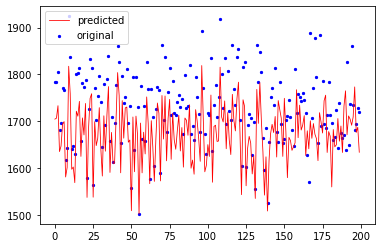

+++++++++++++++++++++++++++  CNN STARTING HHERE  +++++++++++++++
Epoch 1/20
560/560 [==============================] - 11s 20ms/step - loss: 524.5878 - val_loss: 9102.1826
Epoch 2/20
560/560 [==============================] - 11s 20ms/step - loss: 395.7246 - val_loss: 8766.1426
Epoch 3/20
560/560 [==============================] - 11s 20ms/step - loss: 355.7670 - val_loss: 8950.7656
Epoch 4/20
560/560 [==============================] - 11s 19ms/step - loss: 300.8137 - val_loss: 9150.7402
Epoch 5/20
560/560 [==============================] - 11s 19ms/step - loss: 375.7665 - val_loss: 8899.0576
Epoch 6/20
560/560 [==============================] - 11s 20ms/step - loss: 329.8621 - val_loss: 8975.6582
Epoch 7/20
560/560 [==============================] - 11s 19ms/step - loss: 289.0470 - val_loss: 9153.6963
Epoch 8/20
560/560 [==============================] - 11s 20ms/step - loss: 322.0177 - val_loss: 9558.5693
Epoch 9/20
560/560 [==============================] - 11s 19ms/step - loss: 344

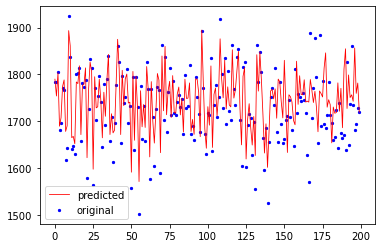

------------------------position k- 2 train: (800, 2501), test: (200, 2501)
+++++++++++++++++++++++++++  ANN STARTING HHERE  +++++++++++++++
Epoch 1/20
560/560 [==============================] - 3s 5ms/step - loss: 1187.3163 - val_loss: 8302.1992
Epoch 2/20
560/560 [==============================] - 3s 5ms/step - loss: 1211.0034 - val_loss: 8231.1025
Epoch 3/20
560/560 [==============================] - 3s 5ms/step - loss: 1182.7555 - val_loss: 9442.5977
Epoch 4/20
560/560 [==============================] - 3s 5ms/step - loss: 1088.9176 - val_loss: 8786.5312
Epoch 5/20
560/560 [==============================] - 3s 5ms/step - loss: 1104.3590 - val_loss: 9213.6885
Epoch 6/20
560/560 [==============================] - 3s 5ms/step - loss: 1117.5979 - val_loss: 8399.9023
Epoch 7/20
560/560 [==============================] - 3s 5ms/step - loss: 994.3998 - val_loss: 8488.2441
Epoch 8/20
560/560 [==============================] - 3s 5ms/step - loss: 1045.9934 - val_loss: 8517.1396
Epoch 9/20
5

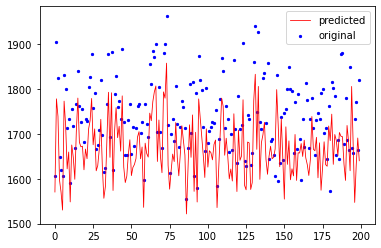

+++++++++++++++++++++++++++  CNN STARTING HHERE  +++++++++++++++
Epoch 1/20
560/560 [==============================] - 11s 19ms/step - loss: 579.5814 - val_loss: 8605.1670
Epoch 2/20
560/560 [==============================] - 11s 20ms/step - loss: 406.0523 - val_loss: 8944.0439
Epoch 3/20
560/560 [==============================] - 10s 18ms/step - loss: 267.8737 - val_loss: 8180.1533
Epoch 4/20
560/560 [==============================] - 10s 19ms/step - loss: 195.3007 - val_loss: 8235.1475
Epoch 5/20
560/560 [==============================] - 10s 19ms/step - loss: 176.8724 - val_loss: 8348.6787
Epoch 6/20
560/560 [==============================] - 11s 19ms/step - loss: 223.7101 - val_loss: 8125.7202
Epoch 7/20
560/560 [==============================] - 11s 19ms/step - loss: 372.8718 - val_loss: 8157.0488
Epoch 8/20
560/560 [==============================] - 10s 19ms/step - loss: 352.4948 - val_loss: 8062.6714
Epoch 9/20
560/560 [==============================] - 10s 19ms/step - loss: 264

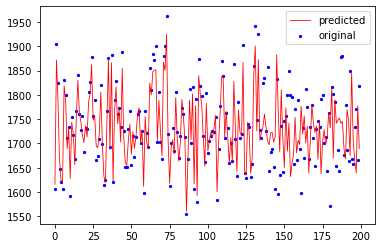

------------------------position k- 3 train: (800, 2501), test: (200, 2501)
+++++++++++++++++++++++++++  ANN STARTING HHERE  +++++++++++++++
Epoch 1/20
560/560 [==============================] - 3s 5ms/step - loss: 1058.0602 - val_loss: 8140.1943
Epoch 2/20
560/560 [==============================] - 3s 4ms/step - loss: 954.9960 - val_loss: 8274.7256
Epoch 3/20
560/560 [==============================] - 2s 4ms/step - loss: 926.4792 - val_loss: 11049.9883
Epoch 4/20
560/560 [==============================] - 2s 4ms/step - loss: 861.2499 - val_loss: 9189.7764
Epoch 5/20
560/560 [==============================] - 3s 5ms/step - loss: 879.3799 - val_loss: 9361.5439
Epoch 6/20
560/560 [==============================] - 3s 5ms/step - loss: 913.6000 - val_loss: 9654.6826
Epoch 7/20
560/560 [==============================] - 3s 4ms/step - loss: 913.1807 - val_loss: 8950.2930
Epoch 8/20
560/560 [==============================] - 3s 5ms/step - loss: 847.9498 - val_loss: 8845.0430
Epoch 9/20
560/56

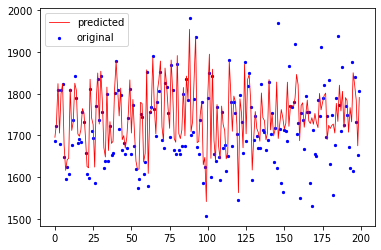

+++++++++++++++++++++++++++  CNN STARTING HHERE  +++++++++++++++
Epoch 1/20
560/560 [==============================] - 10s 19ms/step - loss: 303.7979 - val_loss: 8482.2383
Epoch 2/20
560/560 [==============================] - 10s 19ms/step - loss: 215.5648 - val_loss: 8113.2412
Epoch 3/20
560/560 [==============================] - 10s 19ms/step - loss: 163.4626 - val_loss: 8125.2432
Epoch 4/20
560/560 [==============================] - 10s 19ms/step - loss: 160.6887 - val_loss: 8055.3091
Epoch 5/20
560/560 [==============================] - 10s 19ms/step - loss: 199.6979 - val_loss: 8053.7935
Epoch 6/20
560/560 [==============================] - 10s 19ms/step - loss: 238.4795 - val_loss: 8004.4424
Epoch 7/20
560/560 [==============================] - 10s 19ms/step - loss: 275.4973 - val_loss: 7868.7197
Epoch 8/20
560/560 [==============================] - 10s 19ms/step - loss: 262.6406 - val_loss: 8150.1943
Epoch 9/20
560/560 [==============================] - 11s 19ms/step - loss: 210

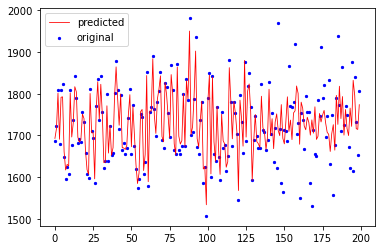

------------------------position k- 4 train: (800, 2501), test: (200, 2501)
+++++++++++++++++++++++++++  ANN STARTING HHERE  +++++++++++++++
Epoch 1/20
560/560 [==============================] - 3s 5ms/step - loss: 805.0365 - val_loss: 13627.1816
Epoch 2/20
560/560 [==============================] - 3s 5ms/step - loss: 782.1531 - val_loss: 8407.1592
Epoch 3/20
560/560 [==============================] - 3s 5ms/step - loss: 756.0508 - val_loss: 9254.4932
Epoch 4/20
560/560 [==============================] - 3s 5ms/step - loss: 724.9161 - val_loss: 8491.1650
Epoch 5/20
560/560 [==============================] - 3s 5ms/step - loss: 690.2907 - val_loss: 8365.0254
Epoch 6/20
560/560 [==============================] - 3s 5ms/step - loss: 728.7789 - val_loss: 12979.8457
Epoch 7/20
560/560 [==============================] - 3s 5ms/step - loss: 701.2894 - val_loss: 8274.9648
Epoch 8/20
560/560 [==============================] - 3s 5ms/step - loss: 709.4879 - val_loss: 8489.5049
Epoch 9/20
560/56

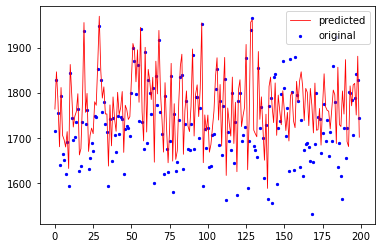

+++++++++++++++++++++++++++  CNN STARTING HHERE  +++++++++++++++
Epoch 1/20
560/560 [==============================] - 11s 19ms/step - loss: 190.4048 - val_loss: 8231.2646
Epoch 2/20
560/560 [==============================] - 11s 20ms/step - loss: 207.1443 - val_loss: 8328.3467
Epoch 3/20
560/560 [==============================] - 11s 19ms/step - loss: 162.5198 - val_loss: 8171.0474
Epoch 4/20
560/560 [==============================] - 11s 19ms/step - loss: 180.0727 - val_loss: 8247.5762
Epoch 5/20
560/560 [==============================] - 11s 19ms/step - loss: 178.3248 - val_loss: 8472.2393
Epoch 6/20
560/560 [==============================] - 11s 19ms/step - loss: 140.6325 - val_loss: 8270.0791
Epoch 7/20
560/560 [==============================] - 11s 19ms/step - loss: 150.5749 - val_loss: 8160.6641
Epoch 8/20
560/560 [==============================] - 11s 19ms/step - loss: 165.9732 - val_loss: 8559.9648
Epoch 9/20
560/560 [==============================] - 11s 19ms/step - loss: 171

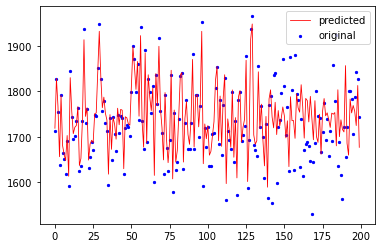

------------------------position k- 5 train: (800, 2501), test: (200, 2501)
+++++++++++++++++++++++++++  ANN STARTING HHERE  +++++++++++++++
Epoch 1/20
560/560 [==============================] - 3s 5ms/step - loss: 697.9055 - val_loss: 11877.2559
Epoch 2/20
560/560 [==============================] - 3s 5ms/step - loss: 675.4775 - val_loss: 9614.0449
Epoch 3/20
560/560 [==============================] - 3s 5ms/step - loss: 636.8519 - val_loss: 11315.0479
Epoch 4/20
560/560 [==============================] - 3s 5ms/step - loss: 638.7480 - val_loss: 9566.8154
Epoch 5/20
560/560 [==============================] - 3s 5ms/step - loss: 608.8354 - val_loss: 8809.8242
Epoch 6/20
560/560 [==============================] - 3s 5ms/step - loss: 620.5887 - val_loss: 10627.8506
Epoch 7/20
560/560 [==============================] - 3s 5ms/step - loss: 626.7328 - val_loss: 9505.5654
Epoch 8/20
560/560 [==============================] - 3s 5ms/step - loss: 624.0784 - val_loss: 9011.7881
Epoch 9/20
560/5

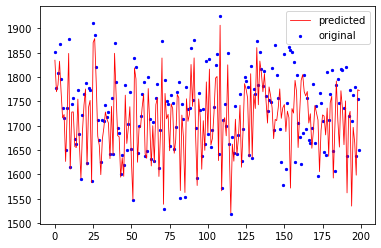

+++++++++++++++++++++++++++  CNN STARTING HHERE  +++++++++++++++
Epoch 1/20
560/560 [==============================] - 10s 19ms/step - loss: 229.6771 - val_loss: 8536.1621
Epoch 2/20
560/560 [==============================] - 11s 19ms/step - loss: 164.3813 - val_loss: 8824.0791
Epoch 3/20
560/560 [==============================] - 10s 19ms/step - loss: 133.8926 - val_loss: 8573.0420
Epoch 4/20
560/560 [==============================] - 10s 19ms/step - loss: 143.5081 - val_loss: 8698.7764
Epoch 5/20
560/560 [==============================] - 10s 19ms/step - loss: 117.3390 - val_loss: 8791.7070
Epoch 6/20
560/560 [==============================] - 10s 19ms/step - loss: 116.8535 - val_loss: 8583.1162
Epoch 7/20
560/560 [==============================] - 10s 19ms/step - loss: 118.7082 - val_loss: 8746.1377
Epoch 8/20
560/560 [==============================] - 11s 19ms/step - loss: 113.7109 - val_loss: 8833.1738
Epoch 9/20
560/560 [==============================] - 11s 19ms/step - loss: 179

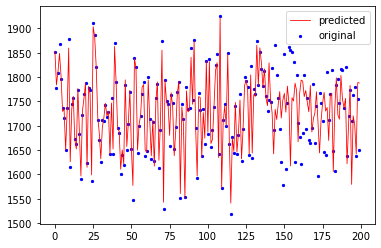

In [23]:
from numpy import array
from sklearn.model_selection import KFold#-----------------------------MAIN LOOP it c

# data sample
#data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
#------------------------------------ prepare cross validation
kfold = KFold(5, True, 1)
k_train = []
k_test = []
k_train.clear()
k_test.clear()
# enumerate splits
count = 1
for train, test in kfold.split(data):
    
    data_train = data[train]#-------------splitting data here
    X_train = data_train[:,0:2500]
    norm = MinMaxScaler().fit(X_train)#-------------------normalizing training data here
    X_train = norm.transform(X_train)
    Y_train = data_train[:,2500]
    
    data_test = data[test]
    X_test = data_test[:,0:2500]
    norm = MinMaxScaler().fit(X_test)#-------------------normalizing testin data here
    X_test = norm.transform(X_test)
    
    Y_test = data_test[:,2500]
    
    
    
    #--------------------------after here we are ready with training and testing data
    #----time to feed into CNN and ANN
    
    
    
    
    #----function for neural network
    print("------------------------position k-",+ count,  'train: %s, test: %s' % (data[train].shape, data[test].shape))
    print("+++++++++++++++++++++++++++  ANN STARTING HHERE  +++++++++++++++")
    ANN_model(X_train,Y_train,X_test,Y_test)#--------------calling Ann function
    
    print("+++++++++++++++++++++++++++  CNN STARTING HHERE  +++++++++++++++")
    CNN_model(X_train,Y_train,X_test,Y_test)#---------------calling cnn function
    
    count = count+1

In [24]:
Average_rmse_ann = (sum(rmse_list_ann)/5)#-------------------calcilate average rmse for comaprison between two models
Average_rmse_cnn = (sum(rmse_list_cnn)/5)


## From the following result CNN is better than ANN



In [26]:
rmse_list_ann

[73.09410040043167,
 89.02007497501361,
 59.641254099416095,
 65.26476829066189,
 53.30310055496208]

In [27]:
rmse_list_cnn

[50.4435751561129,
 54.27775676952652,
 54.85924666837283,
 53.45600570667547,
 47.894752686474554]

In [42]:
print("AVERAGE RMSE OF ANN IS", + Average_rmse_ann)#----------------comapring models here 
print("AVERAGE RMSE OF CNN IS", + Average_rmse_cnn)

AVERAGE RMSE OF ANN IS 68.06465966409708
AVERAGE RMSE OF CNN IS 52.186267397432445


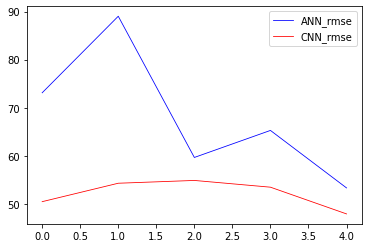

In [41]:
comparison_graph_rmse(rmse_list_ann,rmse_list_cnn)#----------------performace metric using graph